# Ch1. 데이터에서 인사이트 발견하기

## 1. 탐색적 데이터 분석의 과정 
 ###  1) 데이터의 출처와 주제에 대해 이해한다
 ###  2) 데이터의 크기를 알아본다.
 ###  3) 데이터의 구성 요소(피처)를 살펴본다
 ###  4) 데이터의 속성 탐색하기. => 데이터에 질문을 던지기, 피처간의 상관관계 탐색, 수치형/범주형 피처 등
 ###  5) 탐색한 데이터의 시각화 

## 2. 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기
### <Chipotle 데이터 셋의 기초정보 출력하기>

In [21]:
import pandas as pd

file_path = '../Downloads/python-data-analysis-master/data/chipotle.tsv'

chipo = pd.read_csv(file_path, sep = '\t');  #csv파일이 탭으로 분리되어 있음

print(chipo.shape)  # shape : 데이터의 행과 열의 크기를 반환
print("-----------------")
print(chipo.info()) # info() : 행과 열의 구성정보를 나타냄


(4622, 5)
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### <Chipotle 데이터 셋의 행과 열, 데이터 확인하기>

In [29]:
chipo.head(10) # 데이터의 상위 10개 데이터를 보여줌 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [27]:
print(chipo.columns) # 컬럼정보

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [28]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


#### ** order_id 는 숫자의 의미를 가지지 않기 때문에 str로 변경

In [22]:
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


In [31]:
chipo.describe()  # 수치형변수에 대해서 기초 통계량 확인

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [32]:
chipo['quantity'].describe()  # 평균 주문 수량은 약 1.07 => 한 사람이 같은 메뉴를 여러개 구매하는 경우는 많지 않다!!

count    4622.000000
mean        1.075725
std         0.410186
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64

#### ** unique 함수 : 범주형 변수에서 피처 내에 몇개의 범주가 있는지

In [39]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


#### ** value_counts() : 시리즈 객체에만 적용

In [23]:
# 가장 많이 주문한 아이템 top10 출력
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)
print("-----------------------")
for idx, (val, cnt) in enumerate(item_count.iteritems(),1) :
    print("Top", idx, ":", val, cnt)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64
-----------------------
Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


#### ** groupby() : 특정 피처 기준 그룹별 연산

In [24]:
# 아이템별 주문개수 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [25]:
# 아이템별 주문총량 구하기
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### <시각화>

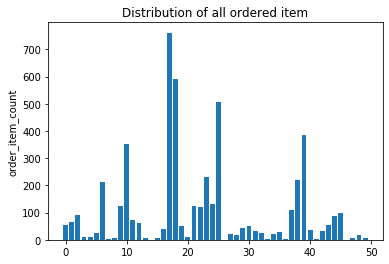

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 아이템별 주문 총량 시각화
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('order_item_count')
plt.title('Distribution of all ordered item')

plt.show()

### <데이터 전처리>

In [73]:
print(chipo.info())
print("------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [26]:
# item_price 컬럼에서 $를 제거하고 수치 데이터로 변경
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### <탐색적 분석 : 스무고개로 개념적 탐색 분석하기>

In [27]:
# 주문당 평균 계산금액 출력하기
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [28]:
# 한 주문에 10달러 이상 지불한 주문번호 출력하기
chipo_orderid_group = chipo.groupby('order_id').sum() # 주문당 총 지불금액
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [29]:
result = chipo_orderid_group[chipo_orderid_group['item_price'] >= 10]
print(result[:10])
print(result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [53]:
# 각 아이템의 가격 구하기
chipo_oneitem = chipo[chipo.quantity ==1] #주문수량이 1개인 경우
price_peritem = chipo_oneitem.groupby('item_name').min() # 각 그룹별 최저가 계산
price_peritem

# 정렬. sort_values(by = '정렬기준 값', ascending = '오름차순(True)/내리차순(False)')
price_peritem.sort_values(by = 'item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


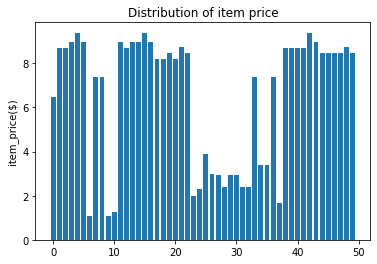

In [62]:
# 시각화
price_peritem
item_name_list = price_peritem.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_peritem['item_price'].tolist()


plt.bar(x_pos, item_price, align='center')
plt.ylabel('item_price($)')
plt.title('Distribution of item price')
plt.show()

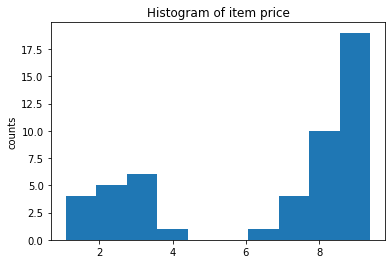

In [63]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [66]:
# 가장 비싼 주문에서 아이템이 총 몇개 팔렸는지

chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


#### ** drop_duplicates  : 중복제거

In [72]:
# Veggie Salad Bowl 이 몇번 주문되었는지
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
chipo_salad 
print(len(chipo_salad))

# 한 주문내에 중복 집계된 item_name을 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name','order_id'])
chipo_salad
print(len(chipo_salad))
chipo_salad.head(5)

18
18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [77]:
# Chicken Bowl을 두개 이상 주문한 주문 횟수 구하기
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken

chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_ordersum

chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >=2]
chipo_chicken_result

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64